In [1]:
# Scenario 3: Director or Cast

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import re
import matplotlib.pyplot as plt
import operator

In [5]:
import numpy as np

In [6]:
pd.set_option('display.max_columns', 100)

In [ ]:
# vars to include in classification model: ratings, cast, director, metadata

In [225]:
credits =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\credits.csv")

In [8]:
links =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\links.csv")

In [11]:
movies =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\movies_metadata.csv")

In [10]:
ratings =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings.csv")

In [316]:
ratings_sm =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings_small.csv")

# links

In [34]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


# Pre-processing for credits

In [226]:
credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [223]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
m_id    45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [229]:
# Get actor names and their gender
records = []
for _, row in credits.iterrows():
    new_records = eval(row['cast'])
    for record in new_records:
        record['movie_id'] = row['id']
    records += new_records
actors = pd.DataFrame(records)

In [230]:
actors.head(5)

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862


In [236]:
# Only keep actors; gender =2
# Only keep actresses; gender =1
actor = actors[(actors['gender'] == 2)]
actress = actors[(actors['gender'] == 1)]

In [237]:
actor.head(5)

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862


In [238]:
actress.head(2)

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,862
9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,862


In [244]:
# Keep the first actor --lead actor
lead_actor = actor.groupby('movie_id').first().reset_index()
lead_actor.head(5)

,movie_id,cast_id,character,credit_id,gender,id,name,order,profile_path
0,2,5,Mikkonen,52fe420dc3a36847f8000031,2,4826,Matti Pellonpää,2,/7WuLvkuWphUAtW6QQwtF3WrwUKE.jpg
1,3,5,Nikander,52fe420dc3a36847f8000087,2,4826,Matti Pellonpää,0,/7WuLvkuWphUAtW6QQwtF3WrwUKE.jpg
2,5,42,Ted the Bellhop,52fe420dc3a36847f80001b7,2,3129,Tim Roth,0,/r4jtlboNqWPz2dOHafrPJE4Yd94.jpg
3,6,7,Frank Wyatt,52fe420dc3a36847f8000259,2,2880,Emilio Estevez,0,/2NSM4zFrw3i16UYdUhfETVjqC4I.jpg
4,11,3,Luke Skywalker,52fe420dc3a36847f8000441,2,2,Mark Hamill,0,/ws544EgE5POxGJqq9LUfhnDrHtV.jpg


In [245]:
lead_actor.rename(columns = {"name": "lead_actor"}, inplace=True)

In [246]:
lead_actor.head(1)

,movie_id,cast_id,character,credit_id,gender,id,lead_actor,order,profile_path
0,2,5,Mikkonen,52fe420dc3a36847f8000031,2,4826,Matti Pellonpää,2,/7WuLvkuWphUAtW6QQwtF3WrwUKE.jpg


In [248]:
# Keep the first actress --lead actress
lead_actress = actress.groupby('movie_id').first().reset_index()
lead_actress.head(2)

,movie_id,cast_id,character,credit_id,gender,id,name,order,profile_path
0,3,6,Ilona Rajamäki,52fe420dc3a36847f800008b,1,5999,Kati Outinen,1,/cjcuhAXRcg8C0VIDHtfz1BIVE3m.jpg
1,5,29,Angela,52fe420dc3a36847f8000183,1,3130,Jennifer Beals,2,/uYa9mUAh3YeFlACaY0rI0Oz7pRf.jpg


In [249]:
lead_actress.rename(columns = {"name": "lead_actress"}, inplace=True)
lead_actress.head(1)

,movie_id,cast_id,character,credit_id,gender,id,lead_actress,order,profile_path
0,3,6,Ilona Rajamäki,52fe420dc3a36847f800008b,1,5999,Kati Outinen,1,/cjcuhAXRcg8C0VIDHtfz1BIVE3m.jpg


In [256]:
# Merge lead actor and lead actress data
lead_cast = lead_actor[['movie_id', 'lead_actor']].merge(lead_actress[['movie_id', 'lead_actress']], on=['movie_id'], how='outer')

In [254]:
lead_actor.shape

(38884, 9)

In [255]:
lead_actress.shape

(34089, 9)

In [257]:
lead_cast.shape

(40334, 3)

In [258]:
lead_cast.head(1)

,movie_id,lead_actor,lead_actress
0,2,Matti Pellonpää,NaN


In [ ]:
# Extract director names
director_regex = re.compile(r"'Director', 'name': '(.*?)'")
credits['director'] = credits['crew'].apply(lambda x: ', '.join(director_regex.findall(x)))

In [ ]:
# List of directors without ''
cond = credits.director == ''
directors = credits.loc[~cond, ['id', 'director']] #List of directors without ''

In [262]:
# Get the name of the first director
def get_first_director_string(x):
    name_list = x.split(",")
    if len(name_list) < 1:
        return x
    else:
        first_name_string = ", ".join([name_list[0].strip()])
        return first_name_string

In [265]:
credits['director1'] = credits['director'].apply(lambda x: get_first_director_string(x))
credits.head(2)

,cast,crew,id,director,director1
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,Joe Johnston


In [264]:
credits.head(5)

,cast,crew,id,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


In [259]:
credits.shape

(45476, 4)

In [275]:
# Merge lead cast and director file
cast_director = lead_cast.merge(credits[['id', 'director1']], how='outer', left_on='movie_id', right_on='id')
cast_director.head(10)

,movie_id,lead_actor,lead_actress,id,director1
0,2.0,Matti Pellonpää,NaN,2,Aki Kaurismäki
1,3.0,Matti Pellonpää,Kati Outinen,3,Aki Kaurismäki
2,5.0,Tim Roth,Jennifer Beals,5,Allison Anders
3,6.0,Emilio Estevez,Christine Harnos,6,Stephen Hopkins
4,11.0,Mark Hamill,Carrie Fisher,11,George Lucas
5,12.0,Albert Brooks,Ellen DeGeneres,12,Andrew Stanton
6,13.0,Tom Hanks,Robin Wright,13,Robert Zemeckis
7,14.0,Kevin Spacey,Annette Bening,14,Sam Mendes
8,15.0,Orson Welles,Dorothy Comingore,15,Orson Welles
9,16.0,David Morse,Björk,16,Lars von Trier


# End preprocessing credits

# Preprocessing movies

# movies pre-processing
# Extract information from each column, dedup, keep relevant vars

In [ ]:
def extract_int_or_do_nothing(x):
    string_int= "".join(re.findall(r'[0-9]*', x))
    if string_int:
        return int(string_int)
    else:
        return x

In [ ]:
movies2['imdbid'] = movies2['imdb_id'].apply(lambda x: extract_int_or_do_nothing(x))

In [30]:
# Extract data from JSONified object
regex = re.compile(r": '(.*?)'")
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(regex.findall(x)))

In [31]:
print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 3
Number of missing values in spoken_languages column: 6


In [32]:
movies.dropna(subset=['production_companies'], axis='rows', inplace=True)
movies.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 0
Number of missing values in spoken_languages column: 0


In [33]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
movies['production_countries'] = movies['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45460 non-null object
belongs_to_collection    4490 non-null object
budget                   45460 non-null object
genres                   45460 non-null object
homepage                 7778 non-null object
id                       45460 non-null object
imdb_id                  45443 non-null object
original_language        45449 non-null object
original_title           45460 non-null object
overview                 44506 non-null object
popularity               45460 non-null object
poster_path              45077 non-null object
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [34]:
# Changing columns to the right dtypes
movies['budget'] = movies['budget'].astype(float)
movies['popularity'] = movies['popularity'].astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y/%m/%d', errors='coerce')
movies['runtime'] = pd.to_timedelta(movies['runtime'], unit='m')

In [35]:
# Remove duplicates
cond = movies['imdb_id'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('imdb_id').head(10)

,imdb_id,title,release_date,overview
38871,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
16167,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
949,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
15074,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
838,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
30001,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
7345,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
9165,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
29374,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."
15702,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."


In [36]:
print('Number of duplicate imdb_ids before drop: {}'.format(movies['imdb_id'].duplicated().sum()))
movies.drop_duplicates('imdb_id', inplace=True)
print('Number of duplicate imdb_ids remaining: {}'.format(movies['imdb_id'].duplicated().sum()))

Number of duplicate imdb_ids before drop: 46
Number of duplicate imdb_ids remaining: 0


In [269]:
movies.head(2)

,id,imdb_id,original_title,title,genres,original_language,production_companies,production_countries,budget,runtime
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,"US, United States of America",30000000,81.0
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,"TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America",65000000,104.0


In [272]:
# Get the first production company
def get_first_comp_string(x):
    name_list = x.split(",")
    if len(name_list) < 1:
        return x
    else:
        first_name_string = ", ".join([name_list[0].strip()])
        return first_name_string

In [273]:
movies['prod1'] = movies['production_companies'].apply(lambda x: get_first_comp_string(x))
movies.head(2)

,id,imdb_id,original_title,title,genres,original_language,production_companies,production_countries,budget,runtime,prod1
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,"US, United States of America",30000000,81.0,Pixar Animation Studios
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,"TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America",65000000,104.0,TriStar Pictures


In [276]:
# Get the first production country
def get_first_country_string(x):
    name_list = x.split(",")
    if len(name_list) < 1:
        return x
    else:
        first_name_string = ", ".join([name_list[0].strip()])
        return first_name_string

In [277]:
movies['country'] = movies['production_countries'].apply(lambda x: get_first_country_string(x))
movies.head(2)

,id,imdb_id,original_title,title,genres,original_language,production_companies,production_countries,budget,runtime,prod1,country
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,"US, United States of America",30000000,81.0,Pixar Animation Studios,US
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,"TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America",65000000,104.0,TriStar Pictures,US


In [278]:
# Keep only select columns
movies2 = movies[['id', 'imdb_id', 'original_title', 'title', 'genres', 'original_language', 'prod1', 'country', 'budget', 'runtime']]
movies2.head(5)

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,"Romance, Comedy",en,Warner Bros.,US,0,101.0
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Comedy, Drama, Romance",en,Twentieth Century Fox Film Corporation,US,16000000,127.0
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Comedy,en,Sandollar Productions,US,0,106.0


In [280]:
# Extract numbers from movies.imdb_id
movies2['imdb_id'] = movies2['imdb_id'].astype(str)

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [281]:
def extract_int_or_do_nothing(x):
    string_int= "".join(re.findall(r'[0-9]*', x))
    if string_int:
        return int(string_int)
    else:
        return x

In [282]:
movies2['imdbid'] = movies2['imdb_id'].apply(lambda x: extract_int_or_do_nothing(x))

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
movies2.head(2)

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0,113497


In [284]:
movies2[pd.isnull(movies2).any(axis=1)]

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid
634,287305,tt0117312,Peanuts – Die Bank zahlt alles,Peanuts – Die Bank zahlt alles,Comedy,de,Westdeutscher Rundfunk (WDR),DE,0,NaN,117312
635,339428,tt0116485,Happy Weekend,Happy Weekend,Comedy,de,Senator Film Produktion,DE,0,NaN,116485
644,278978,tt0118026,Und keiner weint mir nach,Und keiner weint mir nach,Drama,de,,DE,0,NaN,118026
802,282919,tt0112865,Diebinnen,Diebinnen,Drama,de,,DE,0,NaN,112865
863,253632,tt0094822,Baton Rouge,Baton Rouge,Thriller,fr,,,0,NaN,94822
...,...,...,...,...,...,...,...,...,...,...,...
45246,231216,tt0441908,Villa Henriette,Villa Henriette,Comedy,de,,AT,0,NaN,441908
45310,418757,tt4112020,Między nami dobrze jest,Między nami dobrze jest,,pl,,,0,NaN,4112020
45313,369444,tt0098035,Ostatni dzwonek,Ostatni dzwonek,Drama,pl,,PL,0,NaN,98035
45377,317389,tt0070695,Simbad e il califfo di Bagdad,Simbad e il califfo di Bagdad,Adventure,es,Roas Produzioni,IT,0,NaN,70695


In [285]:
movies2.shape

(45414, 11)

In [286]:
links.shape

(45843, 3)

In [93]:
pd.isnull(movies2).sum()

id                        0
imdb_id                   1
original_title            0
title                     0
genres                    0
original_language        11
production_companies      0
production_countries      0
budget                    0
runtime                 255
dtype: int64

In [289]:
# Separate each genre into dummy variable from movies data
# movies 3 : movies2 + genre as a dummy var
genre_dummies = movies2.genres.str.get_dummies(sep=', ') #Creating dummy variables for genres from movies2
movies3 = movies2.join(genre_dummies) #Joining movies2 with genre_dummies
movies3.head(3)

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0,113497,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,"Romance, Comedy",en,Warner Bros.,US,0,101.0,113228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [290]:
# merge movies and links
movies_link = movies3.merge(links, how='left', left_on='imdbid', right_on='imdbId')
movies_link.shape

(45414, 34)

In [291]:
movies_link.head(5)

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0,113497,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2.0,113497.0,8844.0
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,"Romance, Comedy",en,Warner Bros.,US,0,101.0,113228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,113228.0,15602.0
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Comedy, Drama, Romance",en,Twentieth Century Fox Film Corporation,US,16000000,127.0,114885,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,114885.0,31357.0
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Comedy,en,Sandollar Productions,US,0,106.0,113041,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,113041.0,11862.0


# Pre-processing rating -- average the rating by movie

In [111]:
ratings.shape

(26024289, 4)

In [292]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [311]:
ratings2 = ratings[['movieId', 'rating']]
ratings2.head(2)

,movieId,rating
0,110,1.0
1,147,4.5


In [312]:
avgrate = ratings2.groupby(['movieId']).mean()
avgrate.head(10)

,rating
movieId,
1,3.888157
2,3.236953
3,3.175550
4,2.875713
5,3.079565
6,3.841764
7,3.372105
8,3.129191
9,3.008365


In [313]:
ratings2.groupby('movieId')['rating'].mean()

movieId
1         3.888157
2         3.236953
3         3.175550
4         2.875713
5         3.079565
            ...   
176267    4.000000
176269    3.500000
176271    5.000000
176273    1.000000
176275    3.000000
Name: rating, Length: 45115, dtype: float64

In [315]:
print(ratings2['movieId'] ==1)

0           False
1           False
2           False
3           False
4           False
            ...  
26024284    False
26024285    False
26024286    False
26024287    False
26024288    False
Name: movieId, Length: 26024289, dtype: bool


# Pre-processing rating completed

In [299]:
# add Ratings to movie_link - INNER MERGE, only the movies that have rating information
movies_link_rating = movies_link.merge(avgrate, how='inner', left_on='movieId', right_on='movieId')
movies_link_rating.shape

(44628, 37)

In [300]:
movies_link_rating.head(5)

,id,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0,135121.043616,3.888157,1.113440e+09
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0,113497,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2.0,113497.0,8844.0,134877.953761,3.236953,1.088621e+09
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,"Romance, Comedy",en,Warner Bros.,US,0,101.0,113228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,113228.0,15602.0,136520.452733,3.175550,9.661124e+08
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Comedy, Drama, Romance",en,Twentieth Century Fox Film Corporation,US,16000000,127.0,114885,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,114885.0,31357.0,136249.536062,2.875713,9.390243e+08
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Comedy,en,Sandollar Productions,US,0,106.0,113041,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,113041.0,11862.0,135293.275855,3.079565,9.896788e+08


# Add cast, director information

In [301]:
# Movies, Link, Rating + Credits (director, cast)
movies_link_rating['id'] = movies_link_rating['id'].astype(int)
movies_link_rating_crew = movies_link_rating.merge(cast_director, how='left', left_on='id', right_on='movie_id')
movies_link_rating_crew.shape

(44665, 42)

In [302]:
movies_link_rating_crew.head(10)

,id_x,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp,movie_id,lead_actor,lead_actress,id_y,director1
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0,135121.043616,3.888157,1.113440e+09,862.0,Tom Hanks,Annie Potts,862.0,John Lasseter
1,8844,tt0113497,Jumanji,Jumanji,"Adventure, Fantasy, Family",en,TriStar Pictures,US,65000000,104.0,113497,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2.0,113497.0,8844.0,134877.953761,3.236953,1.088621e+09,8844.0,Robin Williams,Kirsten Dunst,8844.0,Joe Johnston
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,"Romance, Comedy",en,Warner Bros.,US,0,101.0,113228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,113228.0,15602.0,136520.452733,3.175550,9.661124e+08,15602.0,Walter Matthau,Ann-Margret,15602.0,Howard Deutch
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Comedy, Drama, Romance",en,Twentieth Century Fox Film Corporation,US,16000000,127.0,114885,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,114885.0,31357.0,136249.536062,2.875713,9.390243e+08,31357.0,Gregory Hines,Whitney Houston,31357.0,Forest Whitaker
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Comedy,en,Sandollar Productions,US,0,106.0,113041,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,113041.0,11862.0,135293.275855,3.079565,9.896788e+08,11862.0,Steve Martin,Diane Keaton,11862.0,Charles Shyer
5,949,tt0113277,Heat,Heat,"Action, Crime, Drama, Thriller",en,Regency Enterprises,US,60000000,170.0,113277,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,113277.0,949.0,135444.238968,3.841764,1.034524e+09,949.0,Al Pacino,Diane Venora,949.0,Michael Mann
6,11860,tt0114319,Sabrina,Sabrina,"Comedy, Romance",en,Paramount Pictures,DE,58000000,127.0,114319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.0,114319.0,11860.0,134685.315960,3.372105,9.617971e+08,11860.0,Harrison Ford,Julia Ormond,11860.0,Sydney Pollack
7,45325,tt0112302,Tom and Huck,Tom and Huck,"Action, Adventure, Drama, Family",en,Walt Disney Pictures,US,0,97.0,112302,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8.0,112302.0,45325.0,135333.835634,3.129191,9.672952e+08,45325.0,Jonathan Taylor Thomas,Rachael Leigh Cook,45325.0,Peter Hewitt
8,9091,tt0114576,Sudden Death,Sudden Death,"Action, Adventure, Thriller",en,Universal Pictures,US,35000000,106.0,114576,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.0,114576.0,9091.0,133741.574949,3.008365,9.315563e+08,9091.0,Jean-Claude Van Damme,Whittni Wright,9091.0,Peter Hyams
9,710,tt0113189,GoldenEye,GoldenEye,"Adventure, Action, Thriller",en,United Artists,GB,58000000,130.0,113189,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.0,113189.0,710.0,134609.622426,3.431841,1.005402e+09,710.0,Pierce Brosnan,Izabella Scorupco,710.0,Martin Campbell


In [303]:
movies_link_rating_crew[(movies_link_rating_crew['original_title'] != movies_link_rating_crew['title'])]

,id_x,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp,movie_id,lead_actor,lead_actress,id_y,director1
28,902,tt0112682,La Cité des Enfants Perdus,The City of Lost Children,"Fantasy, Science Fiction, Adventure",fr,Procirep,FR,18000000,108.0,112682,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,29.0,112682.0,902.0,134368.532990,3.920885,1.111151e+09,902.0,Ron Perlman,Geneviève Brunet,902.0,Jean-Pierre Jeunet
29,37557,tt0115012,摇啊摇，摇到外婆桥,Shanghai Triad,"Drama, Crime",zh,Ministère des Affaires Étrangères,CN,0,108.0,115012,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,115012.0,37557.0,133848.644280,3.636900,9.363035e+08,37557.0,NaN,Gong Li,37557.0,Zhang Yimou
32,78802,tt0114952,"Guillaumet, les ailes du courage",Wings of Courage,"Romance, Adventure",fr,Iwerks Entertainment,FR,0,50.0,114952,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.0,114952.0,78802.0,125822.291667,3.055556,1.002715e+09,78802.0,Craig Sheffer,Elizabeth McGovern,78802.0,Jean-Jacques Annaud
57,11010,tt0110877,Il postino,The Postman,"Comedy, Drama, Romance",it,,BE,0,108.0,110877,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,58.0,110877.0,11010.0,135583.552259,3.965011,9.890876e+08,11010.0,Philippe Noiret,Maria Grazia Cucinotta,11010.0,Michael Radford
58,99040,tt0112714,Le confessionnal,The Confessional,"Thriller, Drama, Mystery",fr,,CA,0,100.0,112714,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,59.0,112714.0,99040.0,130516.862069,3.600985,9.699659e+08,99040.0,Lothaire Bluteau,Kristin Scott Thomas,99040.0,Robert Lepage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44653,404604,tt5690142,Maa,Mom,"Crime, Drama, Thriller",hi,Mad Films,IN,0,146.0,5690142,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,176249.0,5690142.0,404604.0,106923.000000,3.500000,1.501682e+09,404604.0,Akshaye Khanna,Sridevi Kapoor,404604.0,Ravi Udyawar
44655,67179,tt0069215,San Michele aveva un gallo,St. Michael Had a Rooster,,it,,,0,90.0,69215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176253.0,69215.0,67179.0,107291.000000,4.500000,1.501666e+09,67179.0,Giulio Brogi,NaN,67179.0,Paolo Taviani
44661,439050,tt6209470,رگ خواب,Subdue,"Drama, Family",fa,,IR,0,90.0,6209470,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,176269.0,6209470.0,439050.0,97528.000000,3.500000,1.501765e+09,439050.0,NaN,Leila Hatami,439050.0,Hamid Nematollah
44662,111109,tt2028550,Siglo ng Pagluluwal,Century of Birthing,Drama,tl,Sine Olivia,PH,0,360.0,2028550,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,176271.0,2028550.0,111109.0,837.000000,5.000000,1.501766e+09,111109.0,Joel Torre,Angel Aquino,111109.0,Lav Diaz


In [304]:
movies_link_rating_crew.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\movies_link_rating_crew.csv")

In [337]:
pd.isnull(movies_link_rating_crew).sum()

id_x                     0
imdb_id                  0
original_title           0
title                    0
genres                   0
original_language       11
prod1                    0
country                  0
budget                   0
runtime                252
imdbid                   0
Action                   0
Adventure                0
Animation                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Foreign                  0
History                  0
Horror                   0
Music                    0
Mystery                  0
Romance                  0
Science Fiction          0
TV Movie                 0
Thriller                 0
War                      0
Western                  0
movieId                  0
imdbId                   0
tmdbId                   0
userId                   0
rating                   0
timestamp                0
m

In [31]:
print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 3
Number of missing values in spoken_languages column: 6


In [32]:
movies_link_rating_crew.dropna(subset=['production_companies'], axis='rows', inplace=True)
movies_link_rating_crew.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 0
Number of missing values in spoken_languages column: 0


# Run regression model

In [306]:
from math import exp, log

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.special import expit

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 10, 8

np.seterr(divide='ignore', invalid='ignore')
np.random.seed(42)

In [307]:
pd.set_option('display.max_columns', 100)

In [308]:
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [338]:
movies_link_rating_crew.head(1)

,id_x,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp,movie_id,lead_actor,lead_actress,id_y,director1
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0,135121.043616,3.888157,1.113440e+09,862.0,Tom Hanks,Annie Potts,862.0,John Lasseter


In [340]:
mlrc2 = movies_link_rating_crew[['genres', 'original_language', 'prod1', 'country', 'budget', 'runtime', 'rating', 'lead_actor', 'lead_actress', 'director1']]
mlrc2.head(1)

,genres,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter


In [470]:
mlrc22.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrc22_nonull.csv")

In [395]:
mlrc22 = movies_link_rating_crew[['Action', 'Adventure', 'Animation',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Family',	'Fantasy',	'Foreign',	'History',	'Horror',	'Music',	
                                  'Mystery',	'Romance',	'Science Fiction',	'TV Movie',	'Thriller',	'War',	'Western', 'original_language', 'prod1', 'country', 'budget', 'runtime', 'rating', 
                                  'lead_actor', 'lead_actress', 'director1']]
mlrc22.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter


In [396]:
# Getting error -- probably because of NaN
pd.isnull(mlrc22).sum()

Action                   0
Adventure                0
Animation                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Foreign                  0
History                  0
Horror                   0
Music                    0
Mystery                  0
Romance                  0
Science Fiction          0
TV Movie                 0
Thriller                 0
War                      0
Western                  0
original_language       11
prod1                    0
country                  0
budget                   0
runtime                252
rating                   0
lead_actor            6419
lead_actress         11124
director1             4990
dtype: int64

In [401]:
mlrc22.dropna(subset=['director1'], axis='rows', inplace=True)
mlrc22.dropna(subset=['lead_actress'], axis='rows', inplace=True)
mlrc22.dropna(subset=['lead_actor'], axis='rows', inplace=True)
mlrc22.dropna(subset=['runtime'], axis='rows', inplace=True)
mlrc22.dropna(subset=['original_language'], axis='rows', inplace=True)
pd.isnull(mlrc22).sum()

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Foreign              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science Fiction      0
TV Movie             0
Thriller             0
War                  0
Western              0
original_language    0
prod1                0
country              0
budget               0
runtime              0
rating               0
lead_actor           0
lead_actress         0
director1            0
dtype: int64

In [382]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [402]:
dfle = mlrc22

In [403]:
mlrc22['director1'] = mlrc22['director1'].astype(str)
dfle.director1 = le.fit_transform(dfle.director1)
dfle

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,5587
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,en,TriStar Pictures,US,65000000,104.0,3.236953,Robin Williams,Kirsten Dunst,5410
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Warner Bros.,US,0,101.0,3.175550,Walter Matthau,Ann-Margret,4398
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Twentieth Century Fox Film Corporation,US,16000000,127.0,2.875713,Gregory Hines,Whitney Houston,3411
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,Sandollar Productions,US,0,106.0,3.079565,Steve Martin,Diane Keaton,1725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,en,Concorde-New Horizons,US,0,85.0,2.000000,Mark Sikes,Lisa Boyle,25
44660,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Westdeutscher Rundfunk (WDR),CA,0,104.0,4.000000,Patrick Bergin,Uma Thurman,5572
44662,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,tl,Sine Olivia,PH,0,360.0,5.000000,Joel Torre,Angel Aquino,6640
44663,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,en,American World Pictures,US,0,90.0,1.000000,Adam Baldwin,Erika Eleniak,7292


In [404]:
mlrc22['lead_actor'] = mlrc22['lead_actor'].astype(str)
mlrc22['lead_actress'] = mlrc22['lead_actress'].astype(str)
mlrc22['original_language'] = mlrc22['original_language'].astype(str)
mlrc22['prod1'] = mlrc22['prod1'].astype(str)
mlrc22['country'] = mlrc22['country'].astype(str)
dfle.lead_actor = le.fit_transform(dfle.lead_actor)
dfle.lead_actress = le.fit_transform(dfle.lead_actress)
dfle.original_language = le.fit_transform(dfle.original_language)
dfle.prod1 = le.fit_transform(dfle.prod1)
dfle.country = le.fit_transform(dfle.country)
dfle

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13,5428,103,30000000,81.0,3.888157,8972,800,5587
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,13,7087,103,65000000,104.0,3.236953,7825,5268,5410
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,7445,103,0,101.0,3.175550,9385,620,4398
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13,7144,103,16000000,127.0,2.875713,3267,9864,3411
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,6109,103,0,106.0,3.079565,8577,2354,1725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1697,103,0,85.0,2.000000,5859,5794,25
44660,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13,7491,17,0,104.0,4.000000,6892,9575,5572
44662,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,55,6344,79,0,360.0,5.000000,4412,503,6640
44663,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13,382,103,0,90.0,1.000000,40,2855,7292


In [469]:
mlrc22.shape

(31997, 29)

In [406]:
# Take portion of data
mlrc3 = mlrc22.iloc[0:10000,]
mlrc3.shape

(10000, 29)

In [407]:
# divide data into labels and attributes --mlrc3
X = mlrc3.drop('rating', axis=1)
y = mlrc3['rating']

In [434]:
X.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13,5428,103,30000000,81.0,8972,800,5587


In [435]:
names =list(X.columns)

# CART

In [408]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [461]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes =20, max_depth =8)
rt = regressor.fit(X_train, y_train)
rt

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=20, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [462]:
y_pred = regressor.predict(X_test)

In [463]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
10804,2.975728,3.463463
997,3.556114,3.571723
2656,2.974747,3.463463
6660,3.347087,3.337683
2599,3.747240,2.943277
...,...,...
1164,4.157649,3.541016
3231,3.200000,2.802190
10991,2.752843,2.943277
3039,3.858366,3.541016


In [464]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3649880636874434
Mean Squared Error: 0.20988265674104645
Root Mean Squared Error: 0.45812951961322734


In [465]:
importance = rt.feature_importances_

In [466]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05067
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01474
Feature: 6, Score: 0.42742
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.04569
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.05141
Feature: 21, Score: 0.01020
Feature: 22, Score: 0.05756
Feature: 23, Score: 0.03365
Feature: 24, Score: 0.29841
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01025


NameError: name 'pyplot' is not defined

In [419]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\spark2\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.0 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.9.0-py37hf50a25e_1




g

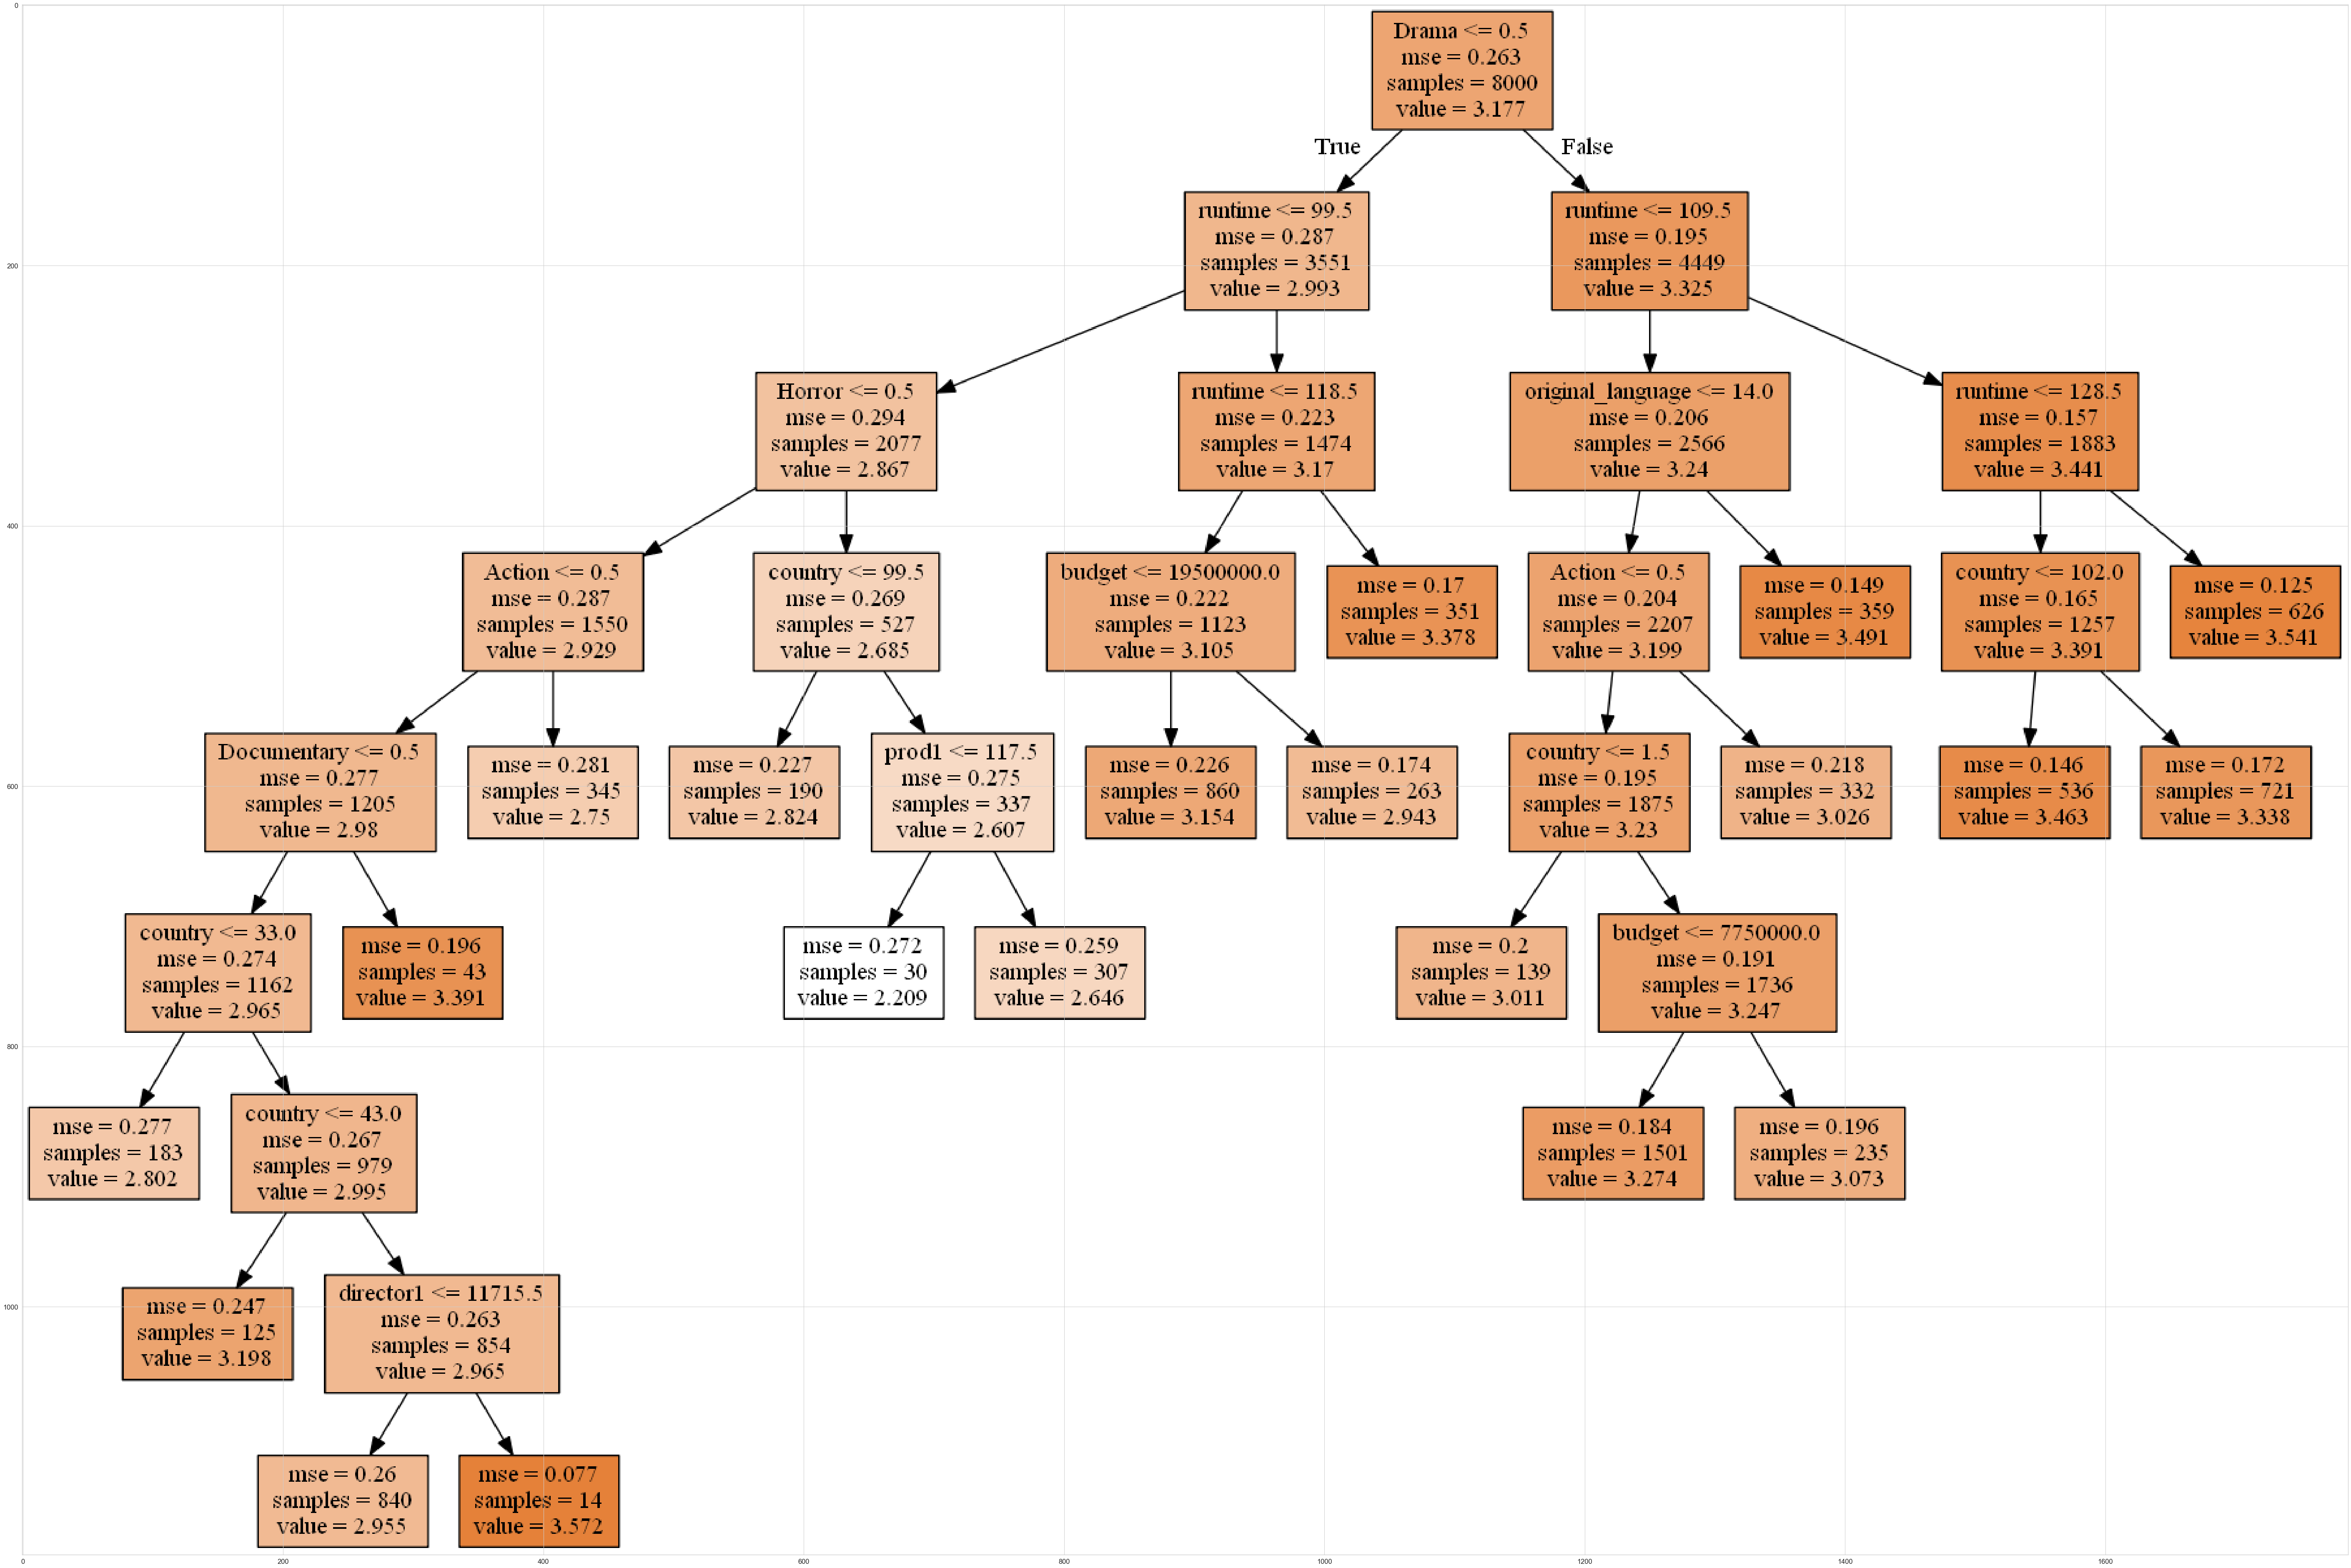

In [467]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'Ratings')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

In [468]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rt, 
                   feature_names= names,  
                   class_names= y.names,
                   filled=True)

AttributeError: 'Series' object has no attribute 'names'

<Figure size 1800x1440 with 0 Axes>

# Weka pre-processing

In [370]:
# Remove whitespace to use in Weka
def remove(string): 
    pattern = re.compile(r'\s+') 
    return re.sub(pattern, '', string) 

In [374]:
mlrc22['lead_actor'] = mlrc22['lead_actor'].astype(str)
mlrc22['lead_actor'] = mlrc22['lead_actor'].apply(lambda x: remove(x))

mlrc22['lead_actress'] = mlrc22['lead_actress'].astype(str)
mlrc22['lead_actress'] = mlrc22['lead_actress'].apply(lambda x: remove(x))

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [372]:
mlrc22['director1'] = mlrc22['director1'].astype(str)
mlrc22['director1'] = mlrc22['director1'].apply(lambda x: remove(x))
mlrc22.head(1)

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,JohnLasseter


In [376]:
mlrc22['prod1'] = mlrc22['prod1'].astype(str)
mlrc22['prod1'] = mlrc22['prod1'].apply(lambda x: remove(x))

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [377]:
mlrc22.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,PixarAnimationStudios,US,30000000,81.0,3.888157,TomHanks,AnniePotts,JohnLasseter


In [378]:
mlrc22.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrc22_nowhitesp.csv")

In [342]:
mlrc2.shape

(44665, 10)

In [363]:
mlrc2['director1'].count()

39675

In [379]:
# Take portion of data
mlrc3 = mlrc22.iloc[0:10000,]
mlrc3.shape

(10000, 29)

In [380]:
mlrc3.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrc22_nowhite_sm.csv")

In [344]:
# divide data into labels and attributes --mlrc2
X = mlrc2.drop('rating', axis=1)
Y = mlrc2['rating']

In [357]:
# divide data into labels and attributes --mlrc3
X = mlrc3.drop('rating', axis=1)
y = mlrc3['rating']

In [353]:
# divide data into labels and attributes --mlrc22
X = mlrc22.drop('rating', axis=1)
Y = mlrc22['rating']

In [358]:
X

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,en,TriStar Pictures,US,65000000,104.0,Robin Williams,Kirsten Dunst,Joe Johnston
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Warner Bros.,US,0,101.0,Walter Matthau,Ann-Margret,Howard Deutch
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Twentieth Century Fox Film Corporation,US,16000000,127.0,Gregory Hines,Whitney Houston,Forest Whitaker
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,Sandollar Productions,US,0,106.0,Steve Martin,Diane Keaton,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,en,Studio Babelsberg,DE,130000000,144.0,Orlando Bloom,Eva Green,Ridley Scott
9996,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,en,Village Roadshow Pictures,US,40000000,113.0,Brian Van Holt,Elisha Cuthbert,Jaume Collet-Serra
9997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,en,Lionsgate,DE,6500000,112.0,Don Cheadle,Sandra Bullock,Paul Haggis
9998,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,Brillstein-Grey Entertainment,US,0,90.0,Martin Short,Jan Hooks,Vadim Jean


In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [360]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'en'